In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [90]:
df = pd.read_csv('/content/HR.csv')

In [91]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## Рассчитайте основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.

In [93]:
num_col = df.select_dtypes(include=['number'])
for i in num_col:
  print(f'Столбец: {i}')
  print('Среднее =', num_col[i].mean())
  print('Медиана =', num_col[i].median())
  print('Мода:', num_col[i].mode())
  print('Минимальное значение =', num_col[i].min())
  print('Максимальное значение =', num_col[i].max())
  print('Среднее отклонение =', num_col[i].std())
  print('++++++++++++++++++++++++++++++++++++++++++++')

Столбец: satisfaction_level
Среднее = 0.6128335222348156
Медиана = 0.64
Мода: 0    0.1
Name: satisfaction_level, dtype: float64
Минимальное значение = 0.09
Максимальное значение = 1.0
Среднее отклонение = 0.24863065106114257
++++++++++++++++++++++++++++++++++++++++++++
Столбец: last_evaluation
Среднее = 0.7161017401160078
Медиана = 0.72
Мода: 0    0.55
Name: last_evaluation, dtype: float64
Минимальное значение = 0.36
Максимальное значение = 1.0
Среднее отклонение = 0.17116911062327533
++++++++++++++++++++++++++++++++++++++++++++
Столбец: number_project
Среднее = 3.80305353690246
Медиана = 4.0
Мода: 0    4
Name: number_project, dtype: int64
Минимальное значение = 2
Максимальное значение = 7
Среднее отклонение = 1.2325923553183522
++++++++++++++++++++++++++++++++++++++++++++
Столбец: average_montly_hours
Среднее = 201.0503366891126
Медиана = 200.0
Мода: 0    135
1    156
Name: average_montly_hours, dtype: int64
Минимальное значение = 96
Максимальное значение = 310
Среднее отклонение = 49

## Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [94]:
df.corr()

<ipython-input-94-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-95-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

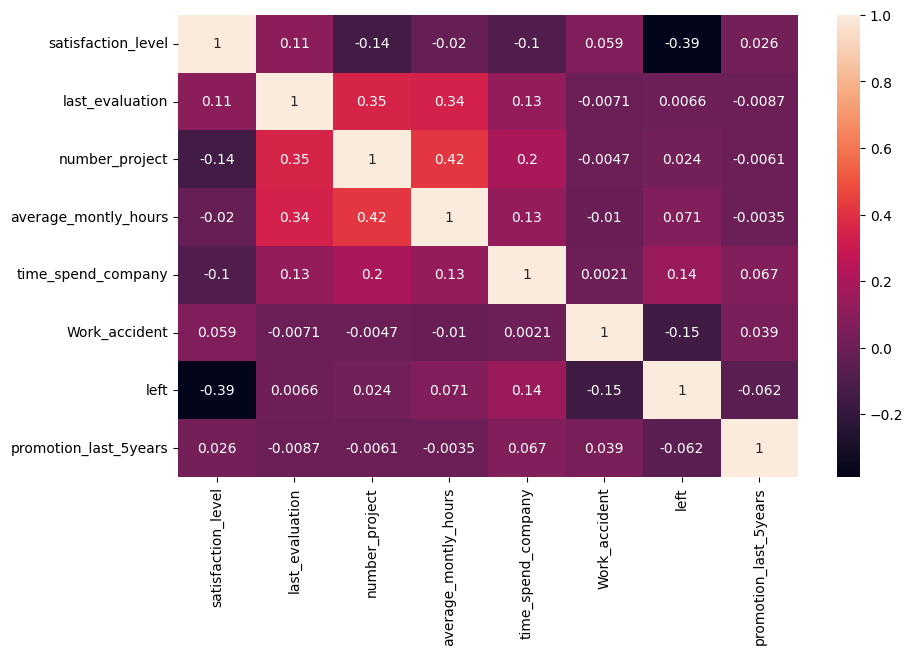

In [95]:
sns.heatmap(df.corr(), annot = True)

  - Наиболее скоррелировнные переменные:
- average_montly_hours и number_project с коэффициентом корреляции = 0.417211
  - Наименее скоррелированные переменные:
- time_spend_company и Work_accident с коэффициентом корреляции = 0.002120

## Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [96]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Покажите распределение сотрудников по зарплатам.

In [97]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: >

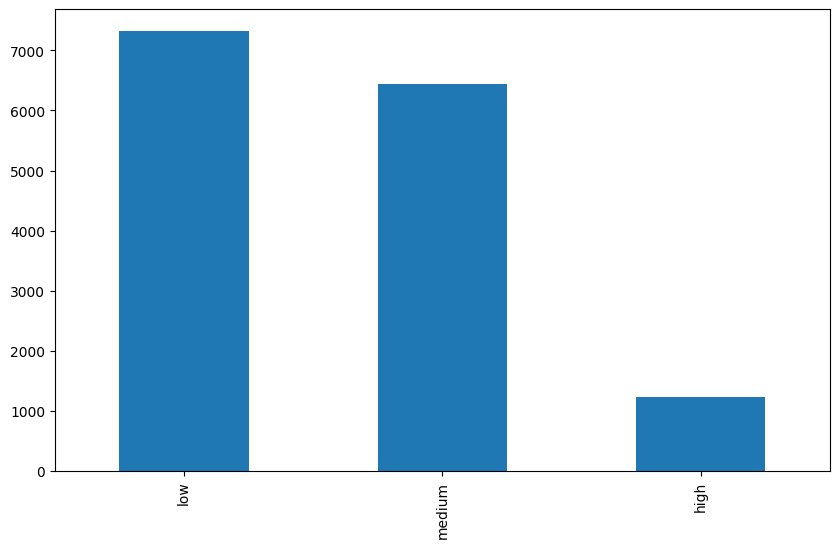

In [98]:
df['salary'].value_counts().plot(kind='bar')

## Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [99]:
salary_counts = df.pivot_table(index='department', columns='salary', values='satisfaction_level', aggfunc='count')
salary_counts

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<Axes: xlabel='department'>

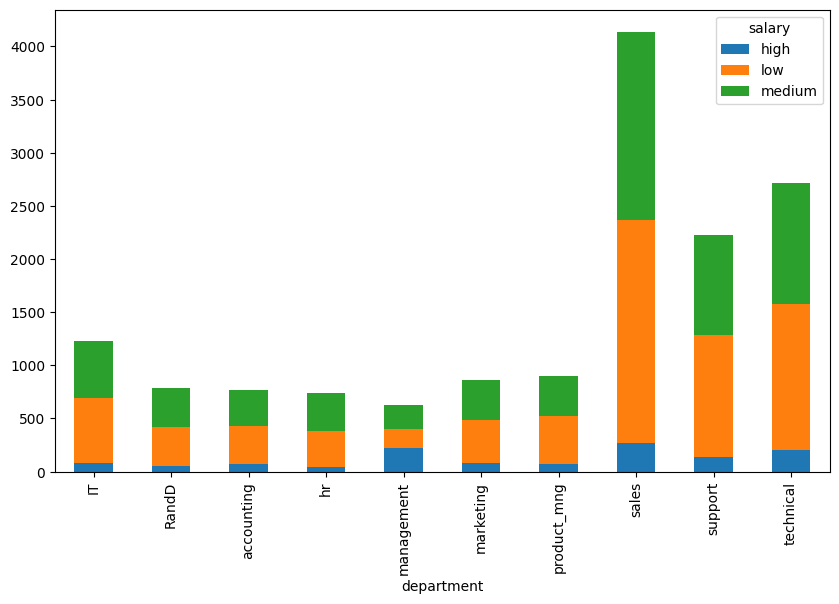

In [100]:
salary_counts.plot(kind='bar', stacked=True)

## Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [101]:
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

print('Среднее количество рабочих часов для сотрудников с высоким окладом', high_salary['average_montly_hours'].mean())
print('Среднее количество рабочих часов для сотрудников с низким окладом', low_salary['average_montly_hours'].mean())

Среднее количество рабочих часов для сотрудников с высоким окладом 199.86742118027485
Среднее количество рабочих часов для сотрудников с низким окладом 200.9965828321487


In [102]:
# H0: Среднее количество рабочих часов для сотрудников с высоким и низким окладом одинаково
# H1: Среднее количество рабочих часов для сотрудников с высоким окладом отличается от сотрудников с низким окладом

t_stat, p_value = ttest_ind(high_salary['average_montly_hours'], low_salary['average_montly_hours'])
print(t_stat, p_value)

if p_value < 0.05:
    print('Отвергаем гипотезу H0')
else:
    print('Не отвергаем гипотезу H0')

-0.7288680398062308 0.4661023478267259
Не отвергаем гипотезу H0


## Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):


In [103]:
left = df[df['left'] == 1]
not_left = df[df['left'] == 0]

### Доля сотрудников с повышением за последние 5 лет

In [104]:
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся:', left['promotion_last_5years'].mean())
print('Доля сотрудников с повышением за последние 5 лет среди не уволившихся:',not_left['promotion_last_5years'].mean())

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005320638476617194
Доля сотрудников с повышением за последние 5 лет среди не уволившихся: 0.026251312565628283


### Cредняя степень удовлетворённости

In [105]:
print('Средняя степень удовлетворенности среди уволившихся:', left['satisfaction_level'].mean())
print('Средняя степень удовлетворенности среди не уволившихся:', not_left['satisfaction_level'].mean())


Средняя степень удовлетворенности среди уволившихся: 0.4400980117614114
Средняя степень удовлетворенности среди не уволившихся: 0.666809590479524


### Среднее количество проектов

In [106]:
print('Среднее количество проектов среди уволившихся:', left['number_project'].mean())
print('Среднее количество проектов среди не уволившихся:', not_left['number_project'].mean())

Среднее количество проектов среди уволившихся: 3.8555026603192384
Среднее количество проектов среди не уволившихся: 3.786664333216661


## Разделите данные на тестовую и обучающую выборки.

In [107]:
X = df.drop(['left', 'department', 'salary'], axis = 1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

In [108]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_predict = lda.predict(X_test)

## Оцените качество модели на тестовой выборке. Используйте метод accuracy

In [109]:
accuracy_score(y_test, y_predict)

0.7557777777777778